In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mclr
from tensorflow.keras import layers
from tensorflow.keras import models
import math
import matplotlib.pyplot as plt

In [2]:
def genData(size=500):
    size1 = size//2
    size2 = size - size1
    t1 = np.random.rand(size1)
    x1 = np.asarray([i * math.cos(i*2*math.pi) + (np.random.rand(1)-1)/2*i for i in t1])
    y1 = np.asarray([i * math.sin(i*2*math.pi) + (np.random.rand(1)-1)/2*i for i in t1])
    data1 = np.hstack((x1, y1))
    label1 = np.zeros([size1, 1])
    div1 = round(size1*0.8)
    t2 = np.random.rand(size2)
    x2 = np.asarray([-i * math.cos(i*2*math.pi) + (np.random.rand(1)-1)/2*i for i in t2])
    y2 = np.asarray([-i * math.sin(i*2*math.pi) + (np.random.rand(1)-1)/2*i for i in t2])
    data2 = np.hstack((x2, y2))
    label2 = np.ones([size2, 1])
    div2 = round(size2*0.8)
    div = div1 + div2
    order = np.random.permutation(div)
    train_data = np.vstack((data1[:div1], data2[:div2]))
    test_data = np.vstack((data1[div1:], data2[div2:]))
    train_label = np.vstack((label1[:div1], label2[:div2]))
    test_label = np.vstack((label1[div1:], label2[div2:]))
    return (train_data[order, :], train_label[order, :]), (test_data, test_label)

In [95]:
def drawResults(data, label, prediction):
    plt.figure(figsize=(15,15))
    p_label = np.array([round(x[0]) for x in prediction])
    plt.scatter(data[:, 0], data[:, 1], s=30, c=label[:, 0], cmap=mclr.ListedColormap(['red', 'blue']))
    plt.scatter(data[:, 0], data[:, 1], s=10, c=p_label, cmap=mclr.ListedColormap(['red', 'blue']))
    plt.grid()
    plt.show()

In [4]:
(train_data, train_label), (test_data, test_label) = genData()

# Создание и обучение модели

In [89]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

H = model.fit(train_data,
              train_label,
              epochs=100,
              batch_size=16,
              validation_split=0.1,
              verbose=False)

# Построение графиков точности и ошибки

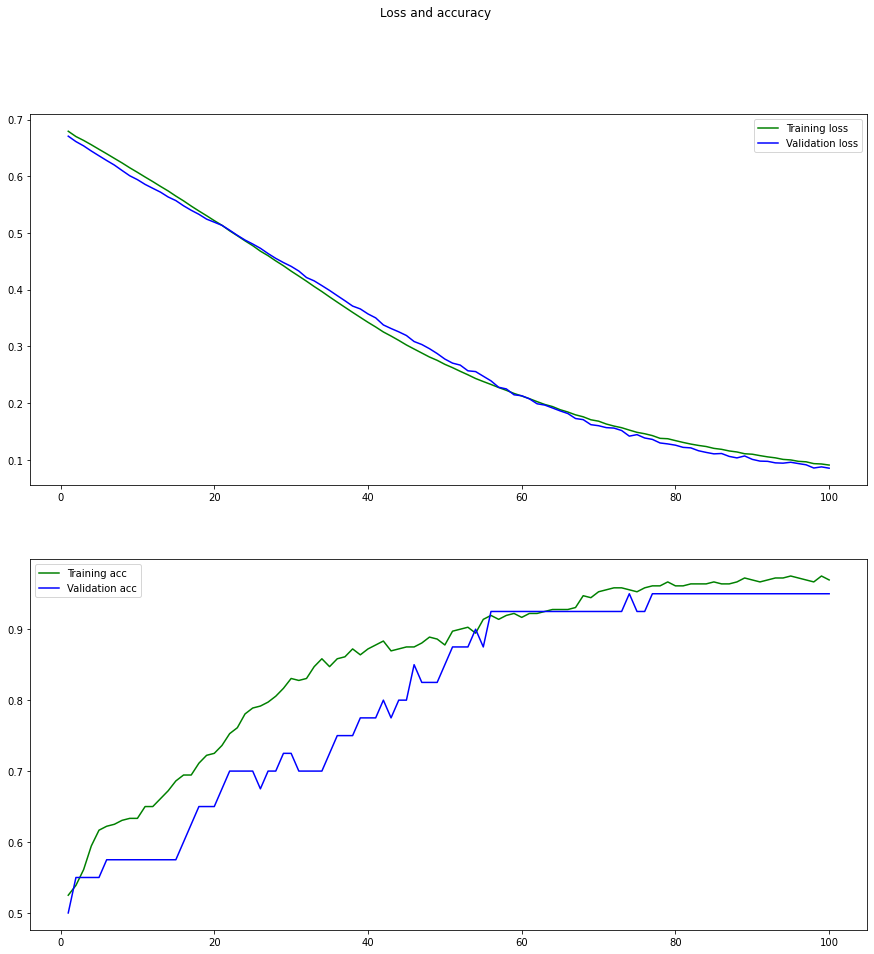

In [90]:
def plot_results(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
    fig.suptitle('Loss and accuracy')

    ax1.plot(epochs, loss, color="green", label='Training loss')
    ax1.plot(epochs, val_loss, color="blue", label='Validation loss')
    # axs[0].xlabel('Epochs')
    # axs[0].ylabel('Loss')
    ax1.legend()

    ax2.plot(epochs, acc, color="green", label='Training acc')
    ax2.plot(epochs, val_acc, color="blue", label='Validation acc')
    # xs[1].xlabel('Epochs')
    # s[1].ylabel('Accuracy')
    ax2.legend()

    plt.show()
plot_results(H)

# Получение и вывод результатов на тестовом наборе

In [91]:
results = model.evaluate(test_data, test_label)

print(results)

4/4 [==============================] - 0s 501us/step - loss: 0.1080 - accuracy: 0.9800
[0.10796044021844864, 0.9800000190734863]


# Вывод результатов бинарной классификации

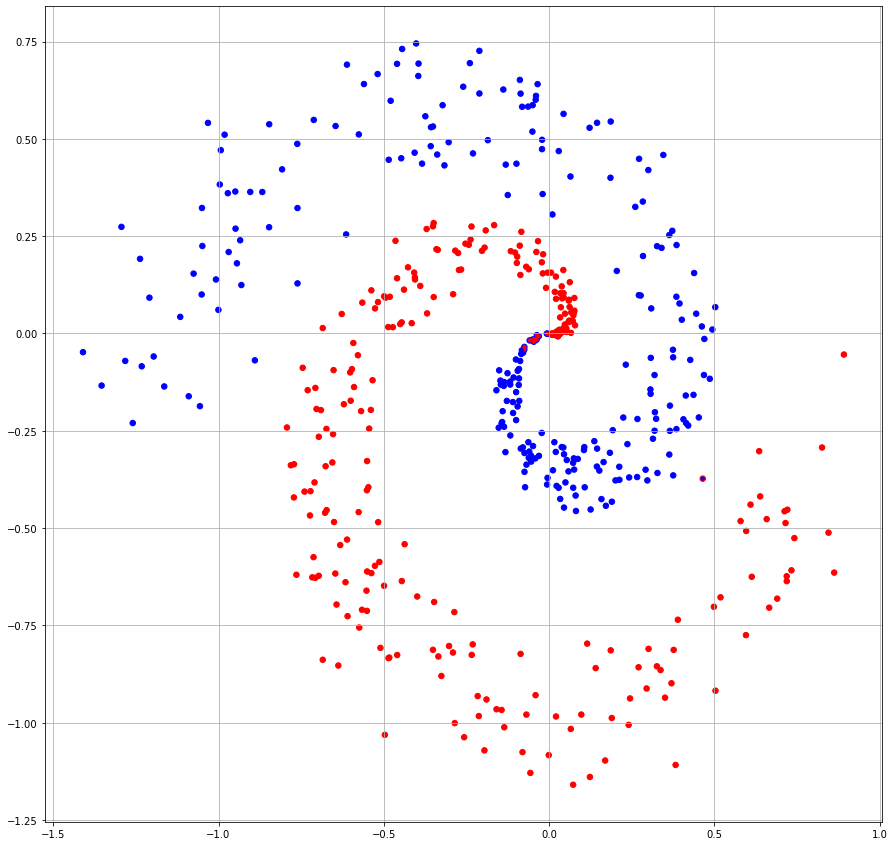

In [96]:
all_data = np.vstack((train_data, test_data))

all_label = np.vstack((train_label, test_label))

pred = model.predict(all_data)

drawResults(all_data, all_label, pred)